In [6]:
from sklearn.neural_network import MLPClassifier
import numpy as np
import pandas as pd
from sklearn.metrics import precision_score, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [7]:
# Ler os arquivos
treino_raw = pd.read_csv('treino-agro-real.csv')
teste_raw = pd.read_csv('teste-agro.csv')

treino = treino_raw.drop('id', axis=1)
teste = teste_raw.drop('id', axis=1)
treino_limpo = treino.drop('target', axis=1)
teste_limpo = teste.drop('target', axis=1)



In [8]:
treino_limpo

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14
0,6.037742,18.243454,40.381390,9.784733,3.451509,4.194046,30.072374,3.476667,6.521961,6.605738,22.462237,68.671411,2.123557,4.556672,3.280207
1,4.864813,18.052841,28.834526,11.217766,2.443611,5.655477,41.134720,3.694615,5.626523,6.536719,12.144566,59.243116,3.237363,2.378608,6.277202
2,5.990206,13.298591,36.587566,9.008438,2.023970,6.461286,32.538523,2.947297,5.333709,4.815262,16.393260,56.160007,3.768556,2.549477,5.292898
3,6.026474,21.558925,24.664167,9.261698,2.814130,6.180293,33.154155,3.403718,4.414961,7.806231,9.716835,46.486271,2.134216,2.264123,5.567176
4,6.644875,25.254258,31.836788,6.095689,2.972857,5.901883,47.081506,2.149458,6.531795,9.144267,15.906459,68.774964,2.899033,2.402410,4.993752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3007,3.978347,18.439959,26.283692,10.780929,2.700619,5.541409,25.253514,3.875720,5.364721,6.676890,15.413593,56.486537,2.551572,3.015394,6.668015
3008,4.808844,20.239550,26.798840,7.769910,3.640395,4.368427,30.590587,4.981109,5.553353,7.328500,14.268234,58.472696,2.286192,2.759055,4.702511
3009,5.316217,15.872608,32.783311,11.162633,2.548931,7.005522,26.744129,3.510147,4.032927,5.747283,9.358833,42.463736,3.922709,2.794536,5.009528
3010,5.788056,22.433387,30.395323,8.400905,2.728774,4.697638,31.406278,3.677206,5.834537,8.122863,12.424128,61.433347,2.600497,2.650119,4.655108


In [9]:
teste_limpo

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,col_10,col_11,col_12,col_13,col_14
0,5.001590,18.481927,37.747465,7.990455,2.372121,4.389570,33.857985,3.662219,7.256647,6.692086,17.148868,76.407119,3.630030,2.962513,3.980504
1,5.383318,16.509491,28.868071,6.741781,1.946905,6.296467,23.999766,4.455653,5.379595,5.977890,18.689246,56.643150,3.798699,3.583896,6.381337
2,6.422562,18.608268,35.123555,11.130218,3.560256,5.324004,46.404734,3.722122,4.812805,6.737833,11.674594,50.675268,3.476456,2.151344,5.333198
3,5.069739,19.529668,24.382316,7.903100,1.833091,4.825352,46.250092,3.129109,7.256182,7.071461,9.702859,76.402217,2.773126,2.427564,4.988387
4,8.378828,13.652370,34.738102,7.886752,2.377390,5.153300,25.733598,2.976946,4.287367,4.943361,11.313993,45.142797,3.229675,3.195091,4.582198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,5.648692,12.151903,33.616939,7.365216,3.193612,5.690936,37.681454,2.041982,6.170510,4.400060,18.368037,64.970902,2.393963,2.750069,4.265303
1184,5.234917,22.252772,34.026744,11.575644,3.845047,4.362713,35.228194,3.141254,6.162440,8.057464,17.143794,64.885928,2.265420,3.990728,4.966921
1185,5.373518,21.427144,30.300114,8.139834,0.375249,3.257935,26.803596,4.639369,8.558725,7.758514,18.106558,90.117027,2.081920,4.791632,3.620163
1186,8.365826,15.016489,44.254349,11.368578,4.242211,4.292858,31.827755,4.008945,3.493721,5.437292,12.841858,36.786293,2.775595,2.661320,3.082622


In [10]:
print(treino.shape, teste.shape)

(3012, 16) (1188, 16)


### Item A:

In [11]:
relu_m = MLPClassifier(activation='relu',hidden_layer_sizes=(200), max_iter=400, tol=0.000001).fit(treino_limpo, treino['target'])
tanh_m = MLPClassifier(activation='tanh', hidden_layer_sizes=(200), max_iter=400, tol=0.000001).fit(treino_limpo, treino['target'])
identity_m = MLPClassifier(activation='identity', hidden_layer_sizes=(200), max_iter=400, tol=0.000001).fit(treino_limpo, treino['target'])
sigmoid_m = MLPClassifier(activation='logistic', hidden_layer_sizes=(200), max_iter=400, tol=0.000001).fit(treino_limpo, treino['target'])
sigmoid_m2 = MLPClassifier(activation='logistic', hidden_layer_sizes=(200), max_iter=400, tol=0.000001).fit(treino_limpo, treino['target'])


In [12]:
print(relu_m.score(teste_limpo, teste['target']))
print(tanh_m.score(teste_limpo, teste['target']))
print(identity_m.score(teste_limpo, teste['target']))
print(sigmoid_m.score(teste_limpo, teste['target']))
print(sigmoid_m2.score(teste_limpo, teste['target']))

0.9242424242424242
0.9242424242424242
0.9158249158249159
0.9284511784511784
0.9234006734006734


In [13]:
pred1 = relu_m.predict(teste_limpo)
pred2 = tanh_m.predict(teste_limpo)
pred3 = identity_m.predict(teste_limpo)
pred4 = sigmoid_m.predict(teste_limpo)
pred5 = sigmoid_m2.predict(teste_limpo)

In [14]:
print(f1_score(teste['target'], pred1, average='weighted'))
print(f1_score(teste['target'], pred2, average='weighted'))
print(f1_score(teste['target'], pred3, average='weighted'))
print(f1_score(teste['target'], pred4, average='weighted'))
print(f1_score(teste['target'], pred5, average='weighted'))

0.8947551418866513
0.8959528398574335
0.8755865627570373
0.9098917750660126
0.8929631178895657


### Item B:

In [15]:
model_i = MLPClassifier(solver='sgd', tol=0.001, learning_rate_init=0.1, momentum=0.5, max_iter=30).fit(treino_limpo, treino['target'])
model_ii = MLPClassifier(solver='sgd', tol=0.001, learning_rate_init=0.5, momentum=0.5, max_iter=30).fit(treino_limpo, treino['target'])
model_iii = MLPClassifier(solver='sgd', tol=0.001, learning_rate_init=0.5, momentum=0.9, max_iter=30).fit(treino_limpo, treino['target'])
model_iv = MLPClassifier(solver='sgd', tol=0.001, learning_rate_init=0.5, momentum=0.1, max_iter=30).fit(treino_limpo, treino['target'])

In [16]:
print(model_i.score(teste_limpo, teste['target']))
print(model_ii.score(teste_limpo, teste['target']))
print(model_iii.score(teste_limpo, teste['target']))
print(model_iv.score(teste_limpo, teste['target']))

0.9158249158249159
0.9158249158249159
0.9158249158249159
0.9158249158249159


In [17]:
pred1 = model_i.predict(teste_limpo)
pred2 = model_ii.predict(teste_limpo)
pred3 = model_iii.predict(teste_limpo)
pred4 = model_iv.predict(teste_limpo)

print(f1_score(teste['target'], pred1, average='weighted'))
print(f1_score(teste['target'], pred2, average='weighted'))
print(f1_score(teste['target'], pred3, average='weighted'))
print(f1_score(teste['target'], pred4, average='weighted'))

0.8755865627570373
0.8755865627570373
0.8755865627570373
0.8755865627570373


### Item D:

In [18]:
tanh_m_i = MLPClassifier(activation='tanh', hidden_layer_sizes=(10), max_iter=200).fit(treino_limpo, treino['target'])
tanh_m_ii = MLPClassifier(activation='tanh', hidden_layer_sizes=(1000,200,300), max_iter=200).fit(treino_limpo, treino['target'])
tanh_m_iii = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,20,30), max_iter=200).fit(treino_limpo, treino['target'])
tanh_m_iv = MLPClassifier(activation='tanh', hidden_layer_sizes=(300,150,75,30,15,7,2), max_iter=200).fit(treino_limpo, treino['target'])

/home/davi/dados/src/python/ic-2024/Redes-Neurais-Artificiais/.venv/lib64/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
print(tanh_m_i.score(teste_limpo, teste['target']))
print(tanh_m_ii.score(teste_limpo, teste['target']))
print(tanh_m_iii.score(teste_limpo, teste['target']))
print(tanh_m_iv.score(teste_limpo, teste['target']))

0.9132996632996633
0.92003367003367
0.9166666666666666
0.9158249158249159


In [20]:
pred1 = tanh_m_i.predict(teste_limpo)
pred2 = tanh_m_ii.predict(teste_limpo)
pred3 = tanh_m_iii.predict(teste_limpo)
pred4 = tanh_m_iv.predict(teste_limpo)

print(f1_score(teste['target'], pred1, average='weighted'))
print(f1_score(teste['target'], pred2, average='weighted'))
print(f1_score(teste['target'], pred3, average='weighted'))
print(f1_score(teste['target'], pred4, average='weighted'))

0.8743247106643499
0.8855309929726487
0.8807112453083391
0.8755865627570373


### Item E:

In [30]:
sample20 = treino.sample(frac=0.2, random_state=42)
sample20_limpo = sample20.drop('target', axis=1)

tanh_m_iii_20 = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,20,30), max_iter=30).fit(sample20_limpo, sample20['target'])

sample50 = treino.sample(frac=0.5, random_state=42)
sample50_limpo = sample50.drop('target', axis=1)

tanh_m_iii_50 = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,20,30), max_iter=30).fit(sample50_limpo, sample50['target'])

sample80 = treino.sample(frac=0.8, random_state=42)
sample80_limpo = sample80.drop('target', axis=1)

tanh_m_iii_80 = MLPClassifier(activation='tanh', hidden_layer_sizes=(10,20,30), max_iter=30).fit(sample80_limpo, sample80['target'])

/home/davi/dados/src/python/ic-2024/Redes-Neurais-Artificiais/.venv/lib64/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davi/dados/src/python/ic-2024/Redes-Neurais-Artificiais/.venv/lib64/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/davi/dados/src/python/ic-2024/Redes-Neurais-Artificiais/.venv/lib64/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


In [31]:
print(tanh_m_iii_20.score(teste_limpo, teste['target']))
print(tanh_m_iii_50.score(teste_limpo, teste['target']))
print(tanh_m_iii_80.score(teste_limpo, teste['target']))

0.9158249158249159
0.9158249158249159
0.9175084175084175


In [32]:
pred20 = tanh_m_iii_20.predict(teste_limpo)
pred50 = tanh_m_iii_50.predict(teste_limpo)
pred80 = tanh_m_iii_80.predict(teste_limpo)

print(f1_score(teste['target'], pred20, average='weighted'))
print(f1_score(teste['target'], pred50, average='weighted'))
print(f1_score(teste['target'], pred80, average='weighted'))

0.8755865627570373
0.8755865627570373
0.8796576313778445


### Item C:

Verificando as várias validações de resultados encontramos nas celulas do item A a médida F com maior valor sendo a gerada pela Sigmoid.

### Item F:

In [51]:
kf = KFold()
results = []

for treino_i, teste_i in kf.split(X=sample80.copy()):
    XTreino, XTeste = sample80.iloc[treino_i], sample80.iloc[teste_i]

    best_model = MLPClassifier(activation='tanh', hidden_layer_sizes=(200), max_iter=400, tol=0.000001).fit(XTreino.drop('target', axis=1), XTreino['target'])
    
    pred = best_model.predict(XTeste.drop('target', axis=1))
    result = f1_score(XTeste['target'], pred)
    results.append(result)

In [52]:
results

[np.float64(0.12244897959183673),
 np.float64(0.13333333333333333),
 np.float64(0.29508196721311475),
 np.float64(0.08333333333333333),
 np.float64(0.09090909090909091)]

In [53]:
media = sum(results)/len(results)
media

np.float64(0.14502134087614182)

In [54]:
variancia = np.var(results)
variancia

np.float64(0.00597957169240255)

### Gráficos e Tabelas:

### LOSS

In [60]:
def loss(modelo, title):
    t_loss = modelo.loss_curve_
    tempo = range(1, len(t_loss) + 1)


    plt.plot(tempo, t_loss, 'r--')
    plt.legend(['Loss'])
    plt.xlabel('Tempo')
    plt.ylabel('Loss')
    plt.title(title)
    plt.show()

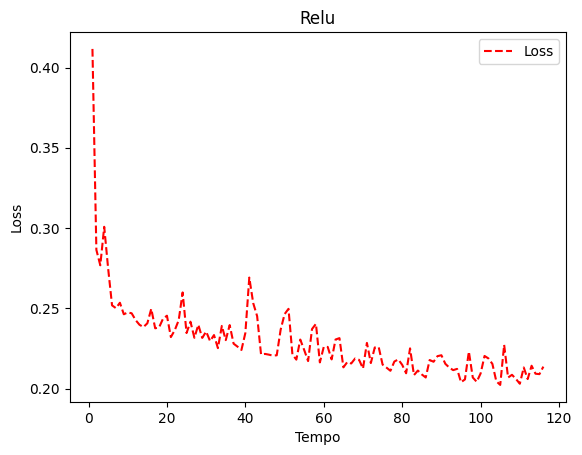

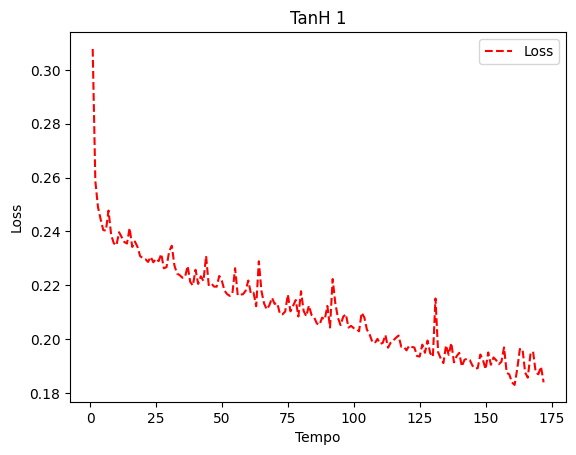

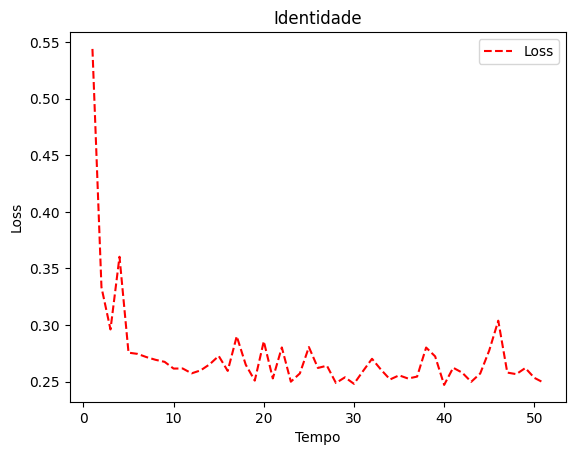

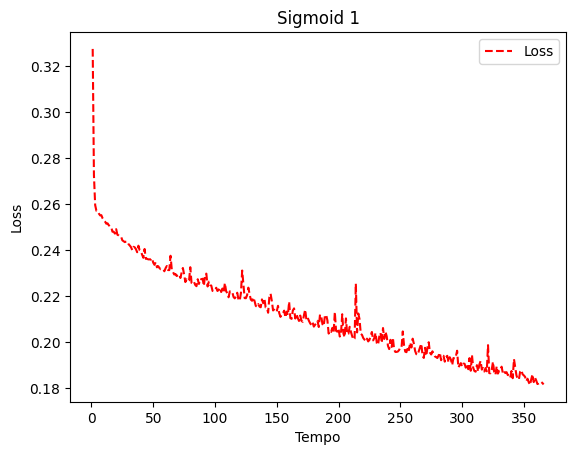

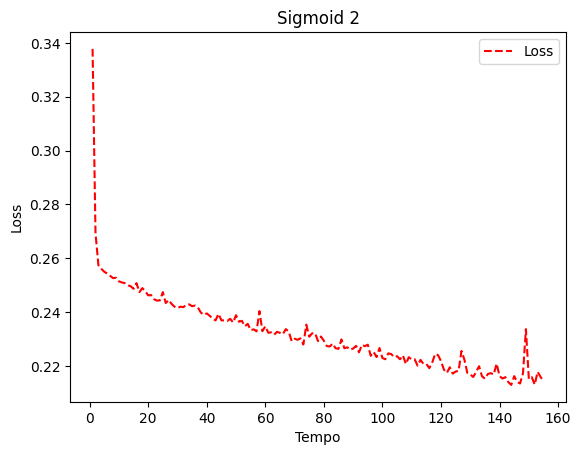

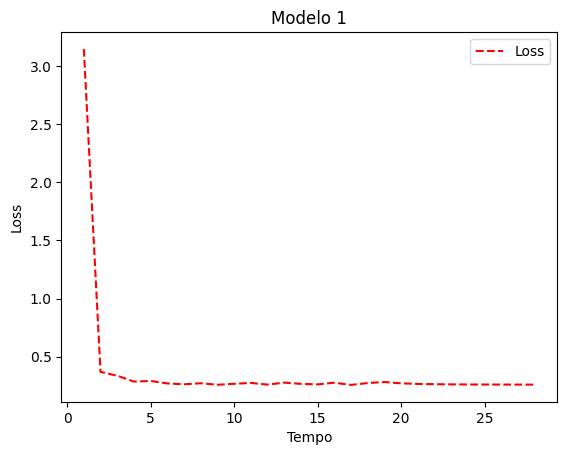

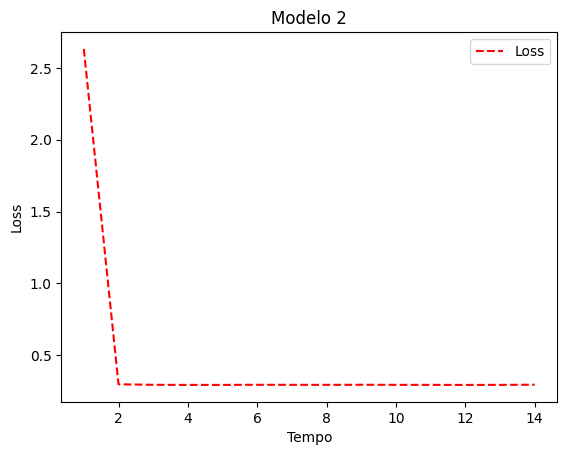

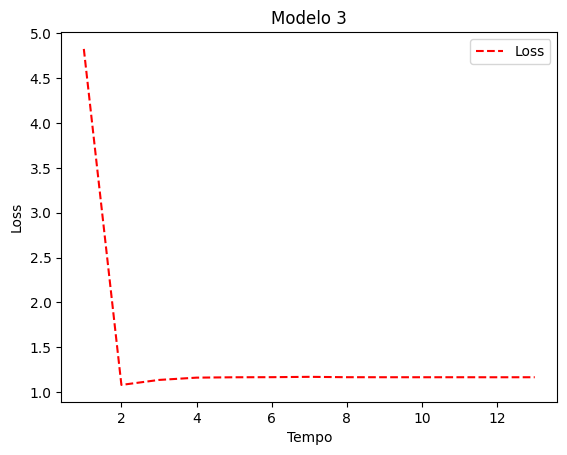

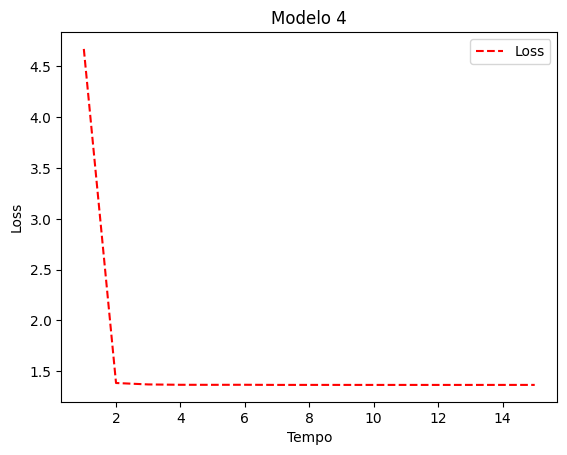

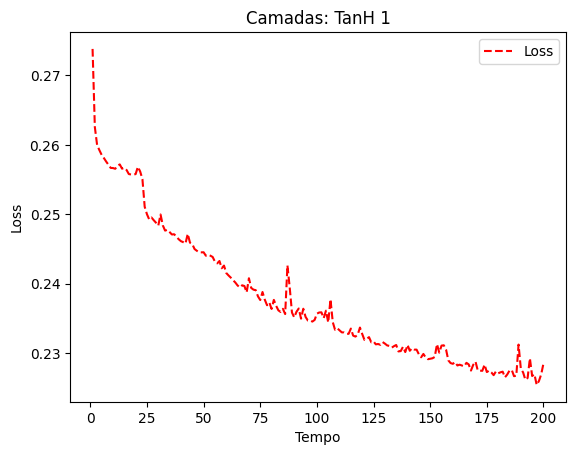

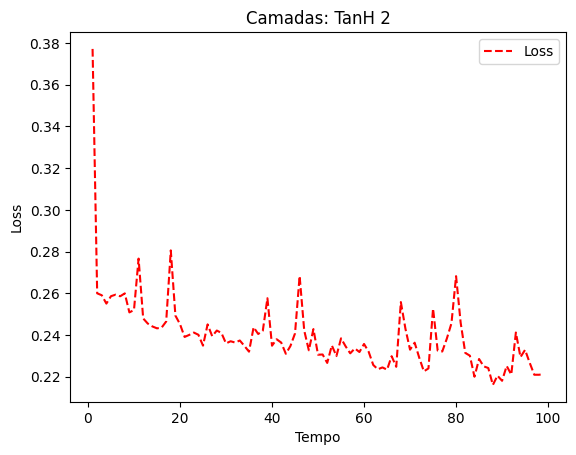

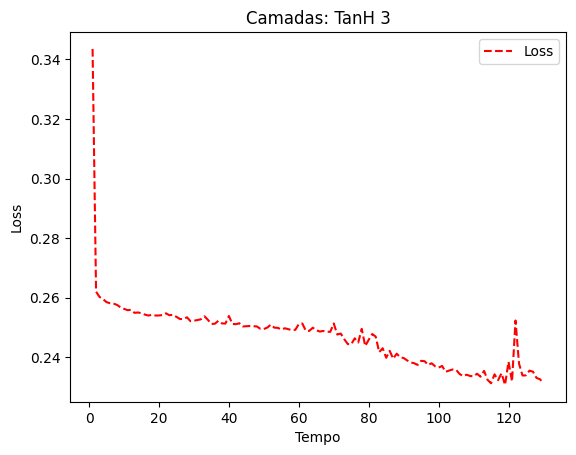

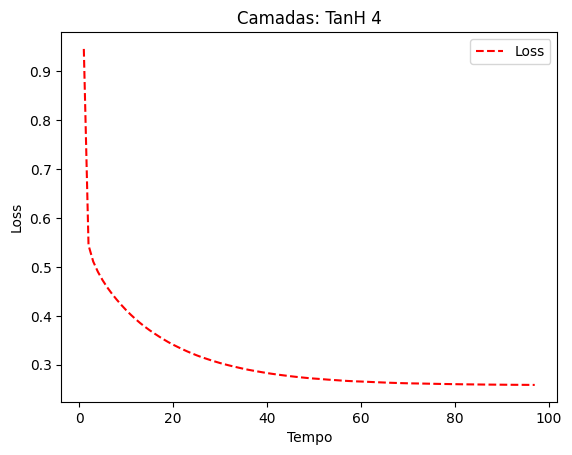

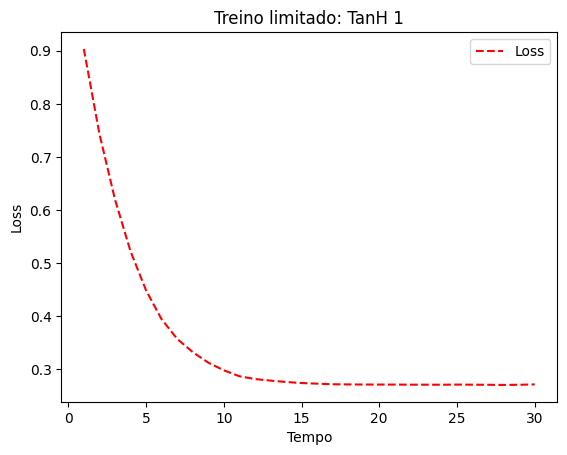

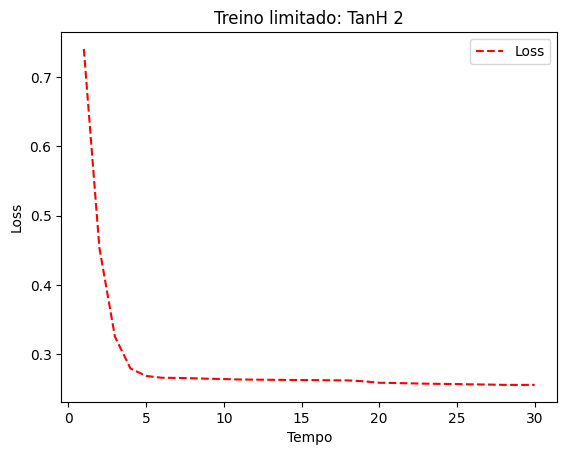

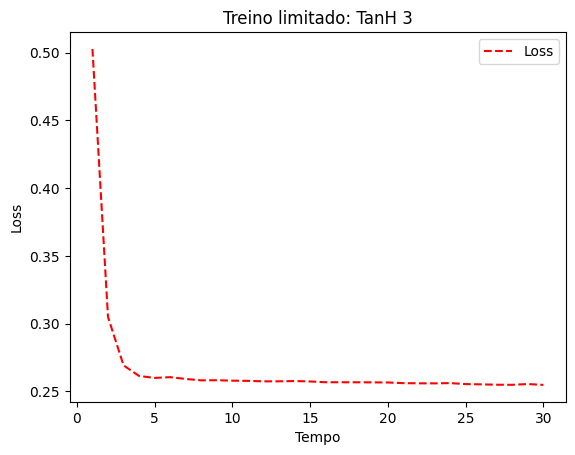

In [61]:
loss(relu_m, 'Relu')
loss(tanh_m, 'TanH 1')
loss(identity_m, 'Identidade')
loss(sigmoid_m, 'Sigmoid 1')
loss(sigmoid_m2, 'Sigmoid 2')
loss(model_i, 'Modelo 1')
loss(model_ii, 'Modelo 2')
loss(model_iii, 'Modelo 3')
loss(model_iv, 'Modelo 4')
loss(tanh_m_i, 'Camadas: TanH 1')
loss(tanh_m_ii, 'Camadas: TanH 2')
loss(tanh_m_iii, 'Camadas: TanH 3')
loss(tanh_m_iv, 'Camadas: TanH 4')
loss(tanh_m_iii_20, 'Treino limitado: TanH 1')
loss(tanh_m_iii_50, 'Treino limitado: TanH 2')
loss(tanh_m_iii_80, 'Treino limitado: TanH 3')